In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import textblob
import wordcloud

plt.style.use('ggplot')

In [2]:
path = '../Dataset/Sentiment_Stock_data.csv'

df = pd.read_csv(path)

df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


# Analysing the data

Getting word count of reviews

In [4]:
df['word_length'] = np.nan

In [5]:
df.head()

,Sentiment,Sentence,word_length
0,0,"According to Gran , the company has no plans t...",NaN
1,1,"For the last quarter of 2010 , Componenta 's n...",NaN
2,1,"In the third quarter of 2010 , net sales incre...",NaN
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,NaN
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",NaN


In [6]:
df.dtypes

Sentiment        int64
Sentence        object
word_length    float64
dtype: object

In [7]:
df.Sentence = df.Sentence.astype(dtype='str')

In [8]:
df.Sentence.apply(lambda x: len(x.split()))

0         24
1         38
2         28
3         23
4         21
          ..
108746    34
108747     8
108748    42
108749    47
108750    55
Name: Sentence, Length: 108751, dtype: int64

In [9]:
df.word_length = df.Sentence.apply(lambda x: len(x.split()))

df.head()

,Sentiment,Sentence,word_length
0,0,"According to Gran , the company has no plans t...",24
1,1,"For the last quarter of 2010 , Componenta 's n...",38
2,1,"In the third quarter of 2010 , net sales incre...",28
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21


In [10]:
df['char_count'] = df.Sentence.apply(lambda x: len(x))

df.head()

,Sentiment,Sentence,word_length,char_count
0,0,"According to Gran , the company has no plans t...",24,126
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192
2,1,"In the third quarter of 2010 , net sales incre...",28,124
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102


In [11]:
df['average_words_length'] = df.char_count/df.word_length

In [12]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length
0,0,"According to Gran , the company has no plans t...",24,126,5.250000
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143


Removing stop-words

In [13]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = stopwords.words('english')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df['stop_word_count'] = df.Sentence.apply(lambda x: len([
    word for word in x.split() if word.lower() in stop_words   
]))

In [16]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4


In [17]:
df['stop_word_proportion'] = df.stop_word_count/df.word_length

df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476


# Data Cleaning

In [18]:
df.Sentence.head()

0    According to Gran , the company has no plans t...
1    For the last quarter of 2010 , Componenta 's n...
2    In the third quarter of 2010 , net sales incre...
3    Operating profit rose to EUR 13.1 mn from EUR ...
4    Operating profit totalled EUR 21.1 mn , up fro...
Name: Sentence, dtype: object

Turning sentence into lowercase

In [19]:
df['lowercase_sentence'] = df.Sentence.apply(lambda x: x.lower())

In [20]:
df.lowercase_sentence[77]

'21 october 2010 - finnish fishing tackle company rapala vmc corp ( hel : rap1v ) said today its net profit rose to eur18 .9 m for the first nine months of 2010 from eur15 .1 m for the same period a year earlier '

Lowercase punctuation removal

In [21]:
df["lowercase_punctuation_removed"] = df['lowercase_sentence'].str.replace('[^\w\s]','', regex=True)

In [22]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000,"according to gran , the company has no plans t...",according to gran the company has no plans to...
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714,"in the third quarter of 2010 , net sales incre...",in the third quarter of 2010 net sales increa...
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur 131 mn from eur 8...
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476,"operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur 211 mn up from ...


Removal of stopwords

In [23]:
df['lowercase_punc_stopwords_removed'] = df.lowercase_punctuation_removed.apply(lambda x:
    " ".join(word for word in x.split() if word not in stop_words)
)

In [24]:
df.lowercase_punc_stopwords_removed.head()

0    according gran company plans move production r...
1    last quarter 2010 componenta net sales doubled...
2    third quarter 2010 net sales increased 52 eur ...
3    operating profit rose eur 131 mn eur 87 mn cor...
4    operating profit totalled eur 211 mn eur 186 m...
Name: lowercase_punc_stopwords_removed, dtype: object

In [25]:
pd.Series(" ".join(df['lowercase_punc_stopwords_removed']).split()).value_counts()[:30]

us            5021
new           3986
says          3244
world         2367
police        2186
government    2138
people        2043
said          1980
first         1954
years         1857
china         1838
war           1828
one           1789
eur           1784
israel        1709
1             1676
company       1624
million       1585
uk            1545
year          1540
russia        1537
president     1473
killed        1458
may           1429
two           1413
review        1386
north         1292
news          1288
man           1281
state         1250
Name: count, dtype: int64

Adding a few extra stopwords based on intuition

In [26]:
more_stop_words = ['says', 'said', 'man', '1', 'one', 'two']

In [27]:
df['clean_sentences'] = df.lowercase_punc_stopwords_removed.apply(
    lambda x:
        " ".join(word for word in x.split() if word not in more_stop_words)
)

In [28]:
df.clean_sentences.head()

0    according gran company plans move production r...
1    last quarter 2010 componenta net sales doubled...
2    third quarter 2010 net sales increased 52 eur ...
3    operating profit rose eur 131 mn eur 87 mn cor...
4    operating profit totalled eur 211 mn eur 186 m...
Name: clean_sentences, dtype: object

# Lemmatization

Using TextBlob to lemmatize words

In [29]:
from textblob import Word 

In [30]:
df['final_lemmatized'] = df.clean_sentences.apply(
    lambda x:
        " ".join(Word(wrd).lemmatize() for wrd in x.split())
)

In [31]:
df.head()

,Sentiment,Sentence,word_length,char_count,average_words_length,stop_word_count,stop_word_proportion,lowercase_sentence,lowercase_punctuation_removed,lowercase_punc_stopwords_removed,clean_sentences,final_lemmatized
0,0,"According to Gran , the company has no plans t...",24,126,5.250000,12,0.500000,"according to gran , the company has no plans t...",according to gran the company has no plans to...,according gran company plans move production r...,according gran company plans move production r...,according gran company plan move production ru...
1,1,"For the last quarter of 2010 , Componenta 's n...",38,192,5.052632,16,0.421053,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sales doubled...,last quarter 2010 componenta net sale doubled ...
2,1,"In the third quarter of 2010 , net sales incre...",28,124,4.428571,8,0.285714,"in the third quarter of 2010 , net sales incre...",in the third quarter of 2010 net sales increa...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sales increased 52 eur ...,third quarter 2010 net sale increased 52 eur 2...
3,1,Operating profit rose to EUR 13.1 mn from EUR ...,23,121,5.260870,6,0.260870,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur 131 mn from eur 8...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...,operating profit rose eur 131 mn eur 87 mn cor...
4,1,"Operating profit totalled EUR 21.1 mn , up fro...",21,102,4.857143,4,0.190476,"operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur 211 mn up from ...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...,operating profit totalled eur 211 mn eur 186 m...


In [39]:
text_data = " ".join(
    temp
    for temp in df.final_lemmatized
)

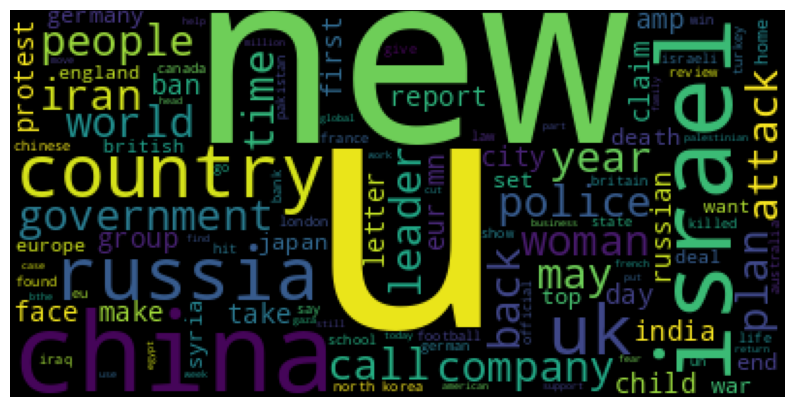

<Figure size 640x480 with 0 Axes>

In [47]:
wrdcld = wordcloud.WordCloud().generate(
    text_data)

# plotting after changing dimensions 
fig = plt.figure() 
fig.set_figwidth(10) 
fig.set_figheight(20) 


plt.imshow(wrdcld)
plt.axis("off")
plt.show()

plt.savefig('../Images/WordCloud.png')